# Right, Clause, and OL_includes

Analysis of ordered liberty use by what right specifically was protected.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
ol_df = pd.read_csv("dataset.csv").drop(columns=["about", "Quotes", "notes", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "how used", "notes.1", "OL_context", "drew_from_1", "drew_from_2"])
ol_df

,Supreme Court Case,citation,year,just_mentioned,author,opinon,DPC,am_inc,other_am,clause_law,kind_1,kind_2,OL_includes,act_protect,OL_protect
0,Palko v. Connecticut v. Conneticut,302 U.S. 319,1937,0,Cardozo,1,1.0,6,-,double jeopardy,1,-,0,0,0
1,Lisenba v. California,314 U.S. 219,1941,NaN,Roberts,1,1.0,6,-,"""fair trial""",1,NaN,NaN,1,NaN
2,Bridges v. California,314 U.S. 252,1941,NaN,Frankfurter,2,0.0,-,1st amendment,NaN,1,NaN,NaN,1,NaN
3,Betts v. Brady,316 U.S. 455,1942,NaN,Black,3,1.0,6,-,"""right to counsel""",1,NaN,NaN,1,NaN
4,Schneiderman v. United States,320 U.S. 118,1943,NaN,Murphy,1,0.0,-,1st amendment,"""freedom of speech""",-,NaN,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Edwards v. Vannoy,141 S. Ct. 1547,2021,1,Gorsuch (Thomas joins),2,1.0,6,-,NaN,1,NaN,1,0,0
88,Edwards v. Vannoy,141 S. Ct. 1547,2021,1,Kagan (Sotomayor & Breyer join),3,1.0,6,-,NaN,1,NaN,1,0,1
89,Dobbs v. Jackson Women's Health Clinic,597 U.S. 215,2022,0,Alito,1,1.0,4,-,unenumerated,2,1,0,0,0
90,Dobbs v. Jackson Women's Health Clinic,597 U.S. 215,2022,0,Kavanaugh,2,1.0,4,-,unenumerated,2,1,0,0,0


<Axes: ylabel='am_inc'>

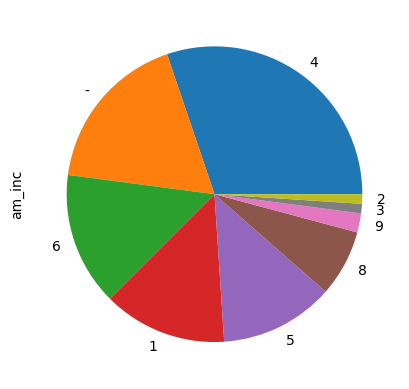

In [23]:
# Start by simply checking how often each amendment comes up:
amendments_series = ol_df["am_inc"].replace({"4th": "4", "1st": "1"}).str.split(r"[^0-9|-]*").explode().value_counts(dropna=True).iloc[1:]
amendments_series.plot(kind="pie")

Recall:
- 4th amendment concerns unreasonable search and seizure, arbitrary arrests, warrantless seraches, etc.
- 6th amendment concerns right to a fair trial (impartial jury, right to an attorney, etc.)
- `-` refers to cases that do not directly concern any of the other amendments (usually only concerned with the 14th)

In [32]:
# We can similarly check what clause laws are most often included (this is a top 10)
ol_df["clause_law"].str.replace('"', '').str.split(r";|, |,").explode().value_counts(dropna=True).iloc[:10]

due process                              14
unreasonable search and seizure           9
unenumerated                              7
cruel and unusual punishment              4
exclusionary rule                         4
double jeopardy                           3
defamation                                3
unenumerated privacy right                3
jury trial                                3
protection against self-incrimination     2
Name: clause_law, dtype: int64